In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Configuración para mostrar imágenes en Jupyter
plt.rcParams['figure.figsize'] = (15, 10)

# Función auxiliar para mostrar imágenes
def mostrar_imagenes(imagenes, titulos, cmap='gray'):
    """
    Muestra múltiples imágenes en una cuadrícula
    """
    n = len(imagenes)
    fig, axes = plt.subplots(1, n, figsize=(5*n, 5))

    if n == 1:
        axes = [axes]

    for i, (img, titulo) in enumerate(zip(imagenes, titulos)):
        axes[i].imshow(img, cmap=cmap)
        axes[i].set_title(titulo, fontsize=12)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

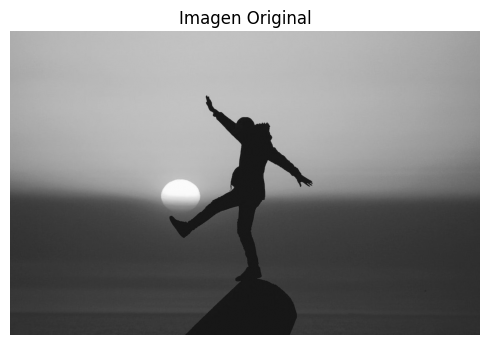

In [8]:
# --- Cargar imagen ---
# Cambia la ruta si usas tu propia imagen
img = cv2.imread('imagen de prueba.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("No se pudo cargar la imagen. Verifica la ruta o el nombre del archivo.")

mostrar_imagenes([img], ['Imagen Original'])

# FILTRO GAUSSIANO

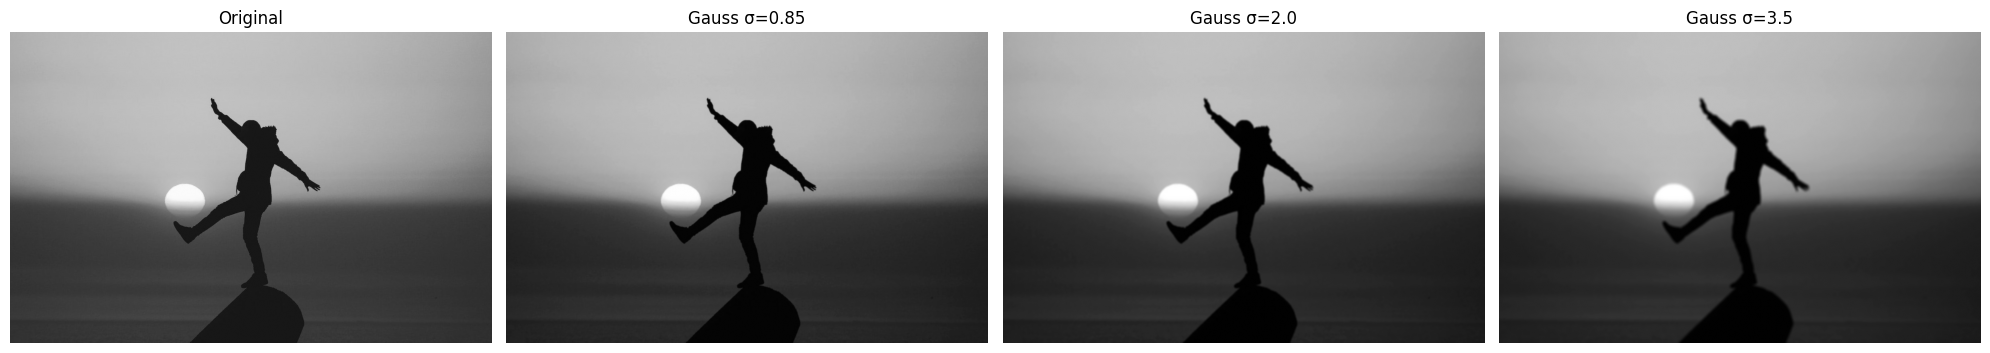

In [9]:
# Parámetros:
# - (5, 5): tamaño del kernel (debe ser impar)
# - sigmaX: desviación estándar en X (σ)
# - sigmaY: desviación estándar en Y (si es 0, usa el mismo valor que sigmaX)

# Diferentes niveles de suavizado
gauss_suave = cv2.GaussianBlur(img, (5, 5), sigmaX=0.85)  # σ pequeño
gauss_medio = cv2.GaussianBlur(img, (7, 7), sigmaX=2.0)   # σ medio
gauss_fuerte = cv2.GaussianBlur(img, (11, 11), sigmaX=3.5) # σ grande

mostrar_imagenes(
    [img, gauss_suave, gauss_medio, gauss_fuerte],
    ['Original', 'Gauss σ=0.85', 'Gauss σ=2.0', 'Gauss σ=3.5']
)


# FILTRO LAPLACIANO

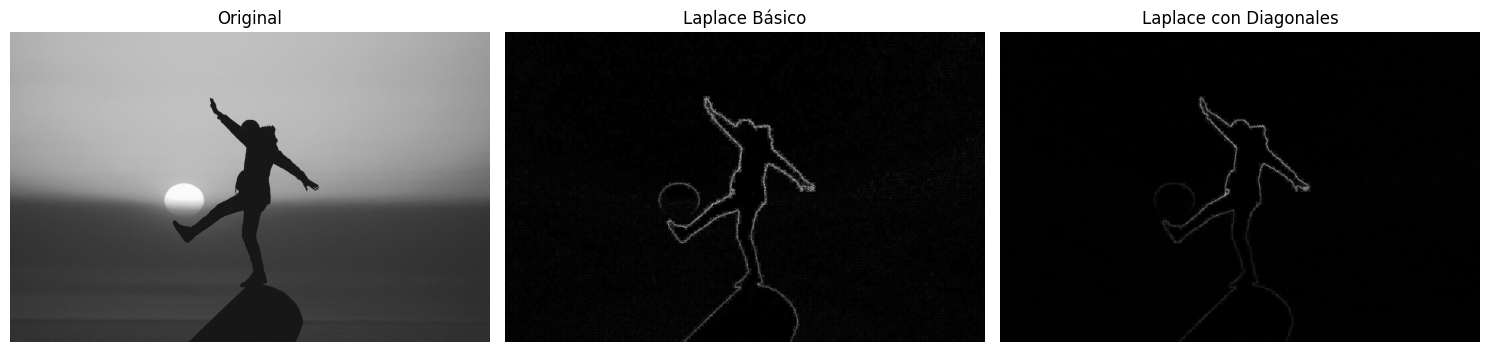

In [10]:
# Filtro Laplaciano
# - ksize: tamaño del kernel (1, 3, 5, 7, etc.)
# - ddepth: profundidad de la imagen de salida (CV_64F para evitar valores negativos)
laplace = cv2.Laplacian(img, cv2.CV_64F, ksize=3)

# Convertir a uint8 para visualización
laplace = np.uint8(np.absolute(laplace))

laplace_diag = cv2.Laplacian(img, cv2.CV_64F, ksize=1)
laplace_diag = np.uint8(np.absolute(laplace_diag))

# Kernel básico usado por Laplacian (ksize=3):
"""([[0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]])"""

# Kernel con diagonales (ksize=1):
"""([[1, 1, 1],
    [1, -8, 1],
    [1, 1, 1]])"""

mostrar_imagenes(
    [img, laplace, laplace_diag],
    ['Original', 'Laplace Básico', 'Laplace con Diagonales']
)

# FILTRO SOBEL

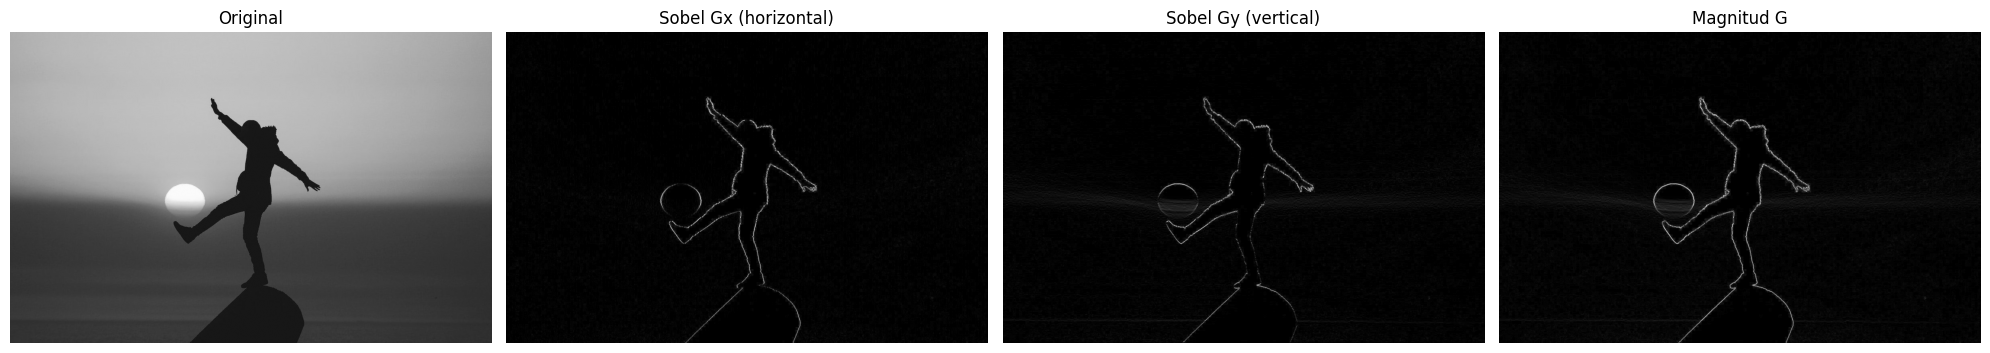

In [11]:
# Calcular gradientes en X e Y
# - dx=1, dy=0: gradiente en X
# - dx=0, dy=1: gradiente en Y
# - ksize: tamaño del kernel (1, 3, 5, 7, etc.)

sobel_x = cv2.Sobel(img, cv2.CV_64F, dx=1, dy=0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, dx=0, dy=1, ksize=3)

# Convertir a valores absolutos
sobel_x_abs = np.uint8(np.absolute(sobel_x))
sobel_y_abs = np.uint8(np.absolute(sobel_y))

# Calcular magnitud del gradiente
magnitud = np.sqrt(sobel_x**2 + sobel_y**2)
magnitud = np.uint8(magnitud)

# Calcular dirección del gradiente (en radianes)
direccion = np.arctan2(sobel_y, sobel_x)

mostrar_imagenes(
    [img, sobel_x_abs, sobel_y_abs, magnitud],
    ['Original', 'Sobel Gx (horizontal)', 'Sobel Gy (vertical)', 'Magnitud G']
)

# DETECTOR DE BORDES CANNY

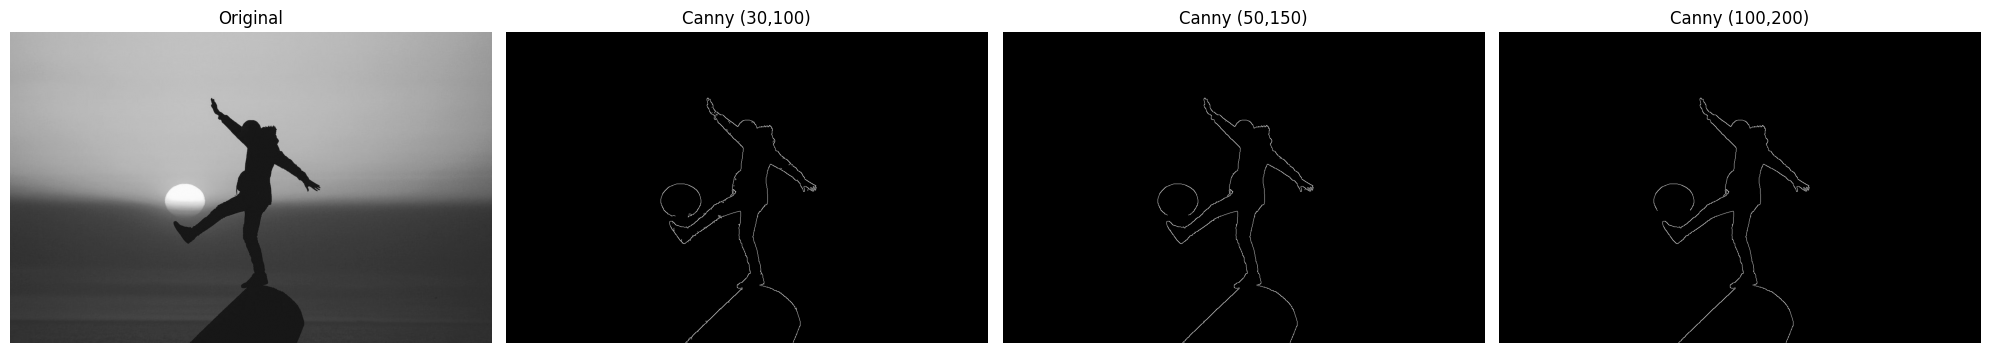

In [12]:
# Parámetros de Canny:
# - threshold1: umbral inferior (bordes débiles)
# - threshold2: umbral superior (bordes fuertes)
# - apertureSize: tamaño del kernel de Sobel (3, 5, 7)
# - L2gradient: si True, usa ecuación más precisa para gradiente

# Diferentes configuraciones de umbrales
canny_sensible = cv2.Canny(img, threshold1=30, threshold2=100, apertureSize=3)
canny_medio = cv2.Canny(img, threshold1=50, threshold2=150, apertureSize=3)
canny_estricto = cv2.Canny(img, threshold1=100, threshold2=200, apertureSize=3)

mostrar_imagenes(
    [img, canny_sensible, canny_medio, canny_estricto],
    ['Original', 'Canny (30,100)', 'Canny (50,150)', 'Canny (100,200)']
)